In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Mendapatkan data saham BBRI
ticker = yf.Ticker("BMRI.JK")

# Mengambil data historis
df = ticker.history(period="max")

# Menampilkan 5 baris terakhir
print(df.tail())


                             Open    High     Low   Close    Volume  \
Date                                                                  
2024-11-14 00:00:00+07:00  6375.0  6475.0  6350.0  6375.0  69750600   
2024-11-15 00:00:00+07:00  6300.0  6400.0  6300.0  6350.0  41079700   
2024-11-18 00:00:00+07:00  6350.0  6425.0  6225.0  6325.0  77471700   
2024-11-19 00:00:00+07:00  6375.0  6375.0  6225.0  6250.0  95495700   
2024-11-20 00:00:00+07:00  6325.0  6350.0  6200.0  6225.0  68707200   

                           Dividends  Stock Splits  
Date                                                
2024-11-14 00:00:00+07:00        0.0           0.0  
2024-11-15 00:00:00+07:00        0.0           0.0  
2024-11-18 00:00:00+07:00        0.0           0.0  
2024-11-19 00:00:00+07:00        0.0           0.0  
2024-11-20 00:00:00+07:00        0.0           0.0  


In [ ]:
# Menghapus kolom 'Dividends' dan 'Stock Splits' dari DataFrame.
del df["Dividends"]
# Kolom ini dihapus karena tidak digunakan dalam analisis.
del df["Stock Splits"]

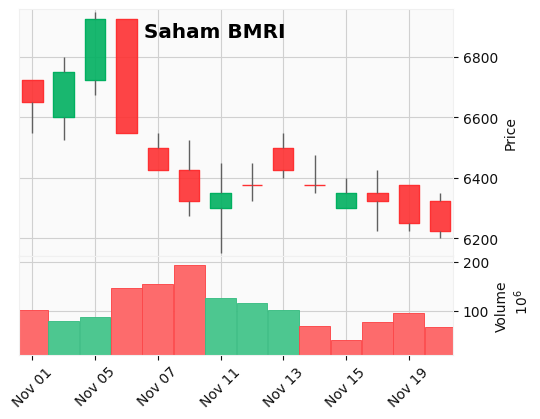

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
# Membuat DataFrame baru bernama 'dfVisual'
# yang berisi data mulai dari 1 Oktober 2024.
dfVisual = df.loc["2024-11-01":].copy()

# Membuat plot candlestick dengan mplfinance.
mpf.plot(dfVisual, # Menggunakan dfVisual sebagai sumber data.
         type='candle', # Menentukan jenis plot sebagai candlestick.
         style='yahoo', # Menggunakan gaya visualisasi seperti Yahoo Finance.
         title='Saham BMRI', # Memberi judul plot "Saham BMRI".
         ylabel='Price', # Memberi label sumbu y sebagai "Price".
         ylabel_lower='Volume', # Memberi label sumbu y bawah sebagai "Volume".
         figsize=(5,4), # Mengatur ukuran gambar (lebar 5, tinggi 4).
         volume=True, # Menampilkan grafik volume di bawah candlestick.
         tight_layout=True) # Mengatur tata letak agar lebih rapi.

# Menampilkan plot yang telah dibuat.
mpf.show

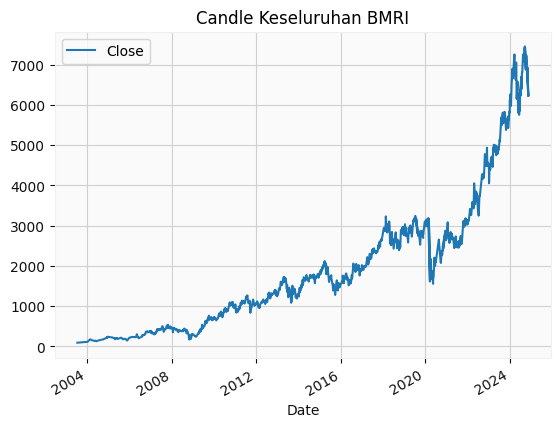

In [ ]:
# Membuat plot garis dari DataFrame 'df'
# dengan kolom 'Close' sebagai data untuk sumbu y.
df.plot.line(y="Close", use_index=True) # use_index=True menggunakan indeks DataFrame sebagai sumbu x.

# Memberikan judul plot "Candle Keseluruhan BBRI".
plt.title("Candle Keseluruhan BMRI")

# Menampilkan plot yang telah dibuat.
plt.show()

In [ ]:
# Membuat DataFrame baru dengan data mulai dari 1 Januari 2021.
# .copy() digunakan untuk membuat salinan,
# agar perubahan tidak memengaruhi DataFrame asli.
df = df.loc["2021-01-01":].copy()

In [ ]:
# Mengimpor library NumPy untuk operasi numerik.
import numpy as np
# Mengimpor library TensorFlow untuk machine learning.
import tensorflow as tf
# Mengimpor MinMaxScaler dari scikit-learn untuk penskalaan data.
from sklearn.preprocessing import MinMaxScaler

# Mengambil data harga penutupan ('Close') dari DataFrame 'df'
# dan mengubahnya menjadi array NumPy 2 dimensi.
prices = df['Close'].values.reshape(-1, 1)

In [ ]:
# Menormalkan data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Membagi data menjadi data latih dan data uji
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [ ]:
# Membuat dataset latih dan uji
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
      X.append(data[i:i+lookback])
      Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

lookback = 10 # temporary
train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)


In [ ]:
# Membangun model RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, input_shape=(lookback, 1)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(train_X, train_Y, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0485
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5731e-04
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1715e-04
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4616e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8101e-04
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1263e-04
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4431e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3363e-04
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8259e-04
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9538e-04
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4250e-04
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9327e-04
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

In [ ]:
# Melakukan prediksi
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

# Menormalkan kembali data
train_preds = scaler.inverse_transform(train_preds)
train_Y = scaler.inverse_transform(train_Y)
test_preds = scaler.inverse_transform(test_preds)
test_Y = scaler.inverse_transform(test_Y)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Menghitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_Y, test_preds)
mae = mean_absolute_error(test_Y, test_preds)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 17857.81767175717
Mean Absolute Error (MAE): 103.82493889664809


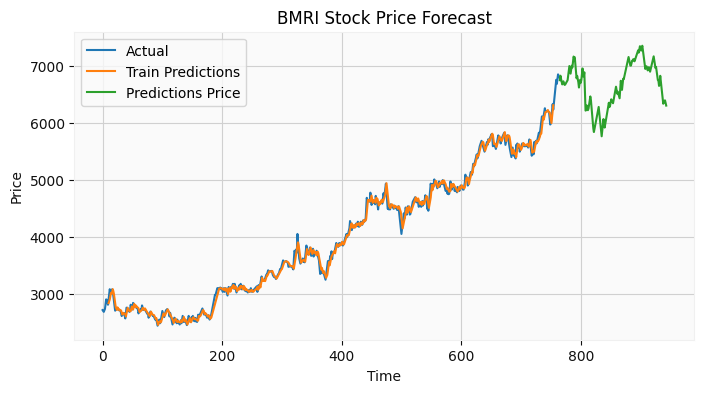

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(prices[:train_size + lookback], label='Actual')
plt.plot(range(lookback, train_size), train_preds, label='Train Predictions')
plt.plot(range(train_size + lookback, len(prices)), test_preds, label='Predictions Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BMRI Stock Price Forecast")
plt.legend()
plt.show()

In [ ]:
# Mengambil periode yang sesuai untuk Test Predictions dan Actual
test_actual = prices[train_size + lookback:]

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({'Harga Sebenarnya': test_actual.flatten(),
                              'Harga Prediksi': test_preds.flatten()})

comparison_df


,Harga Sebenarnya,Harga Prediksi
0,6897.258789,6747.783691
1,6754.556641,6826.188477
2,6706.989746,6773.158691
3,6706.989746,6703.416504
4,6730.773438,6673.424316
...,...,...
174,6375.000000,6388.239746
175,6350.000000,6387.968262
176,6325.000000,6393.752441
177,6250.000000,6361.698730


In [ ]:
comparison_df.to_csv('data_BMRI.csv', index=False)

In [ ]:
dfVisual[dfVisual.index == '2024-10-25']

,Open,High,Low,Close,Volume
Date,,,,,


In [ ]:
import pandas as pd
import yfinance as yf

# Download BBNI.JK data from Yahoo Finance
BBNI = yf.download('BMRI.JK')

# Create a Pandas DataFrame
# Change BMRI to BBNI to create the DataFrame using the downloaded data
df = pd.DataFrame(BBNI)

# Save the DataFrame to a CSV file
df.to_csv('BMRI.csv', index=False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# test_preds berisi prediksi harga saham yang telah dinormalisasi kembali
# Mengambil prediksi harga terakhir (untuk besok)
harga_prediksi_besok = test_preds[-1][0]

# Menampilkan prediksi harga
print("Prediksi harga saham BMRI untuk besok:", harga_prediksi_besok)

Prediksi harga saham BMRI untuk besok: 6302.0977
